# Подготовка датасета

- ### Импорты - база

In [106]:
#https://www.kaggle.com/datasets/fahmidachowdhury/e-commerce-sales-analysis?resource=download

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns

In [66]:
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure


In [67]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [69]:
pd.options.mode.chained_assignment = None

- ### Загружаем и смотрим информацию о датасете

In [60]:
Data = pd.read_csv(r'C:\учеба\подготовка к работе\ecommerce_sales_analysis.csv')

In [61]:
Data.head()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257


In [71]:
print(Data.shape)
print(Data.dtypes)
#list(Data)

(1000, 18)
product_id          int64
product_name       object
category           object
price             float64
review_score      float64
review_count        int64
sales_month_1       int64
sales_month_2       int64
sales_month_3       int64
sales_month_4       int64
sales_month_5       int64
sales_month_6       int64
sales_month_7       int64
sales_month_8       int64
sales_month_9       int64
sales_month_10      int64
sales_month_11      int64
sales_month_12      int64
dtype: object


In [72]:
# отбор числовых колонок
Data_numeric = Data.select_dtypes(include=[np.number])
numeric_cols = Data_numeric.columns.values
print(numeric_cols)



['product_id' 'price' 'review_score' 'review_count' 'sales_month_1'
 'sales_month_2' 'sales_month_3' 'sales_month_4' 'sales_month_5'
 'sales_month_6' 'sales_month_7' 'sales_month_8' 'sales_month_9'
 'sales_month_10' 'sales_month_11' 'sales_month_12']


In [73]:
# отбор нечисловых колонок
Data_non_numeric = Data.select_dtypes(exclude=[np.number])
non_numeric_cols = Data_non_numeric.columns.values
print(non_numeric_cols)

['product_name' 'category']


In [74]:
#Data.query('category == "Toys"')

# Очистка данных

- ### Пропуски

<Axes: >

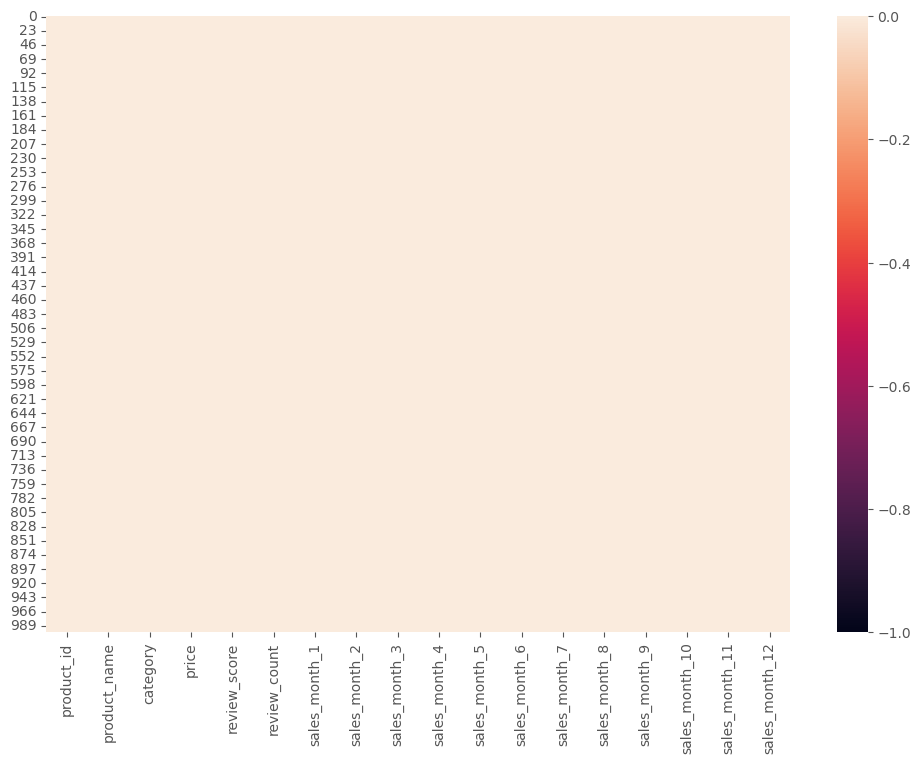

In [85]:
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(Data.isna(), vmin=-1)

In [86]:
for col in Data.columns:
    pct_missing = np.mean(Data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

product_id - 0%
product_name - 0%
category - 0%
price - 0%
review_score - 0%
review_count - 0%
sales_month_1 - 0%
sales_month_2 - 0%
sales_month_3 - 0%
sales_month_4 - 0%
sales_month_5 - 0%
sales_month_6 - 0%
sales_month_7 - 0%
sales_month_8 - 0%
sales_month_9 - 0%
sales_month_10 - 0%
sales_month_11 - 0%
sales_month_12 - 0%


- ### Выбросы

<Axes: >

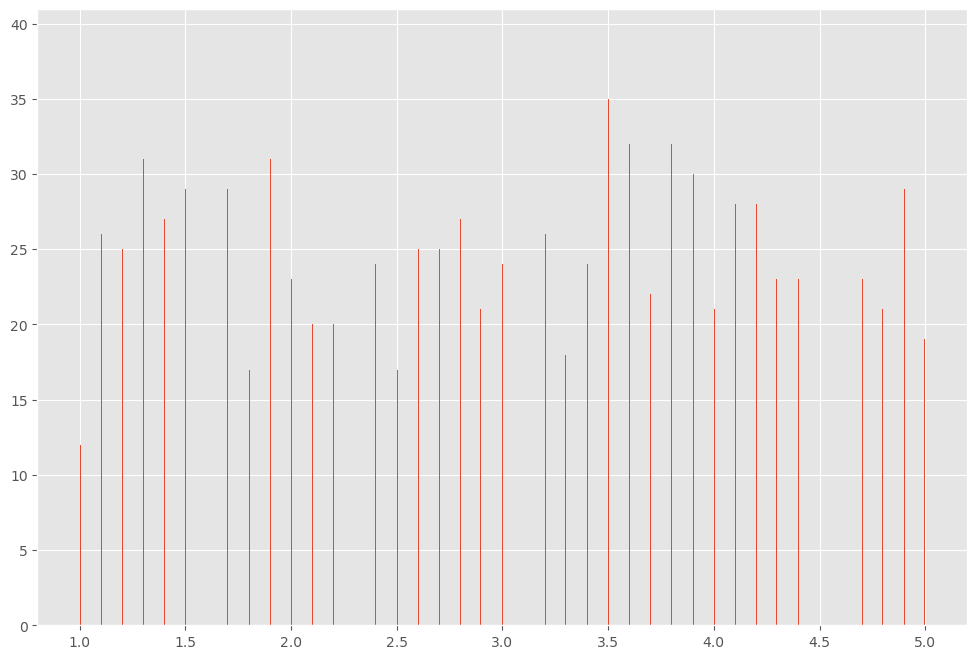

In [101]:
Data.review_score.hist(bins=1000)

Axes(0.125,0.11;0.775x0.77)


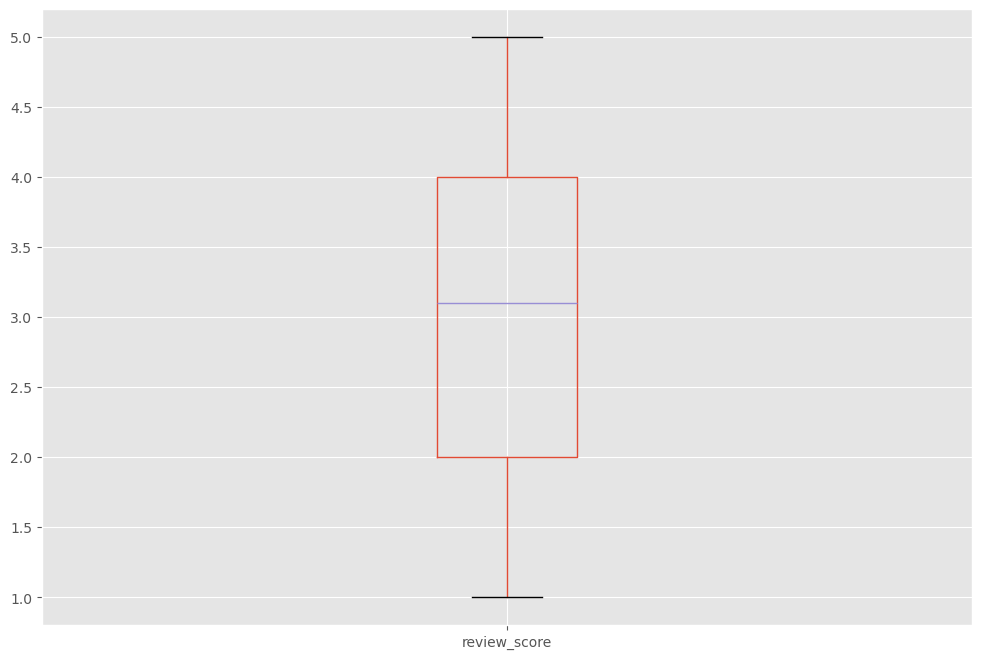

In [102]:
print(Data.boxplot(column=['review_score']))

In [103]:
Data['price'].describe()

count    1000.000000
mean      247.677130
std       144.607983
min         7.290000
25%       121.810000
50%       250.920000
75%       373.435000
max       499.860000
Name: price, dtype: float64

<Axes: xlabel='category'>

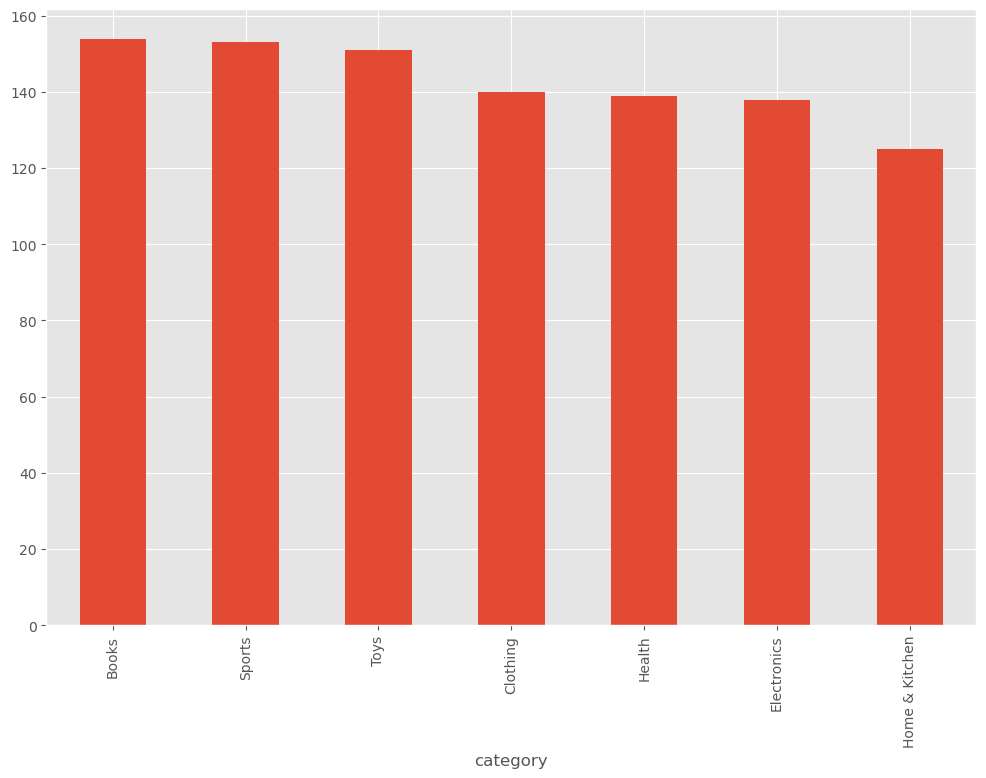

In [104]:
Data.category.value_counts().plot.bar()

In [ ]:
#sales_month_1

In [113]:
#sns.pairplot(Data[4:], corner=True)

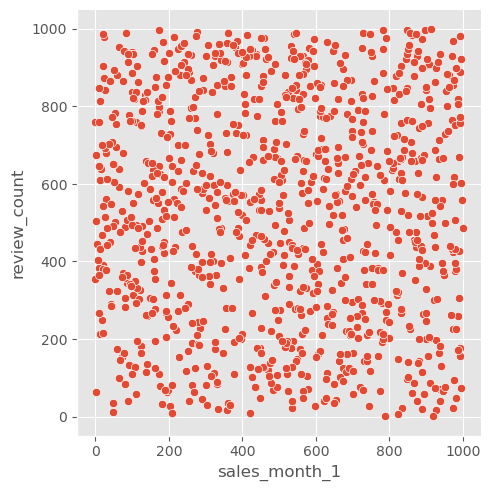

In [121]:
sns.relplot(
    data=Data, x="sales_month_1", y="review_count",
    kind="scatter"
)

- ### Повторяющиеся значения

In [122]:
num_rows = len(Data.index)
low_information_cols = [] #

for col in Data.columns:
    cnts = Data[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

num_missing: 100.00000%
num_missing
0.0    1000
Name: count, dtype: int64



- ### нерелевантные признаки

In [143]:
Data.head()
#Data.product_name.unique()

,product_id,product_name,category,price,review_score,review_count,sales_month_1,sales_month_2,sales_month_3,sales_month_4,sales_month_5,sales_month_6,sales_month_7,sales_month_8,sales_month_9,sales_month_10,sales_month_11,sales_month_12,num_missing
0,1,Product_1,Clothing,190.40,1.7,220,479,449,92,784,604,904,446,603,807,252,695,306,0.0
1,2,Product_2,Home & Kitchen,475.60,3.2,903,21,989,861,863,524,128,610,436,176,294,772,353,0.0
2,3,Product_3,Toys,367.34,4.5,163,348,558,567,143,771,409,290,828,340,667,267,392,0.0
3,4,Product_4,Toys,301.34,3.9,951,725,678,59,15,937,421,670,933,56,157,168,203,0.0
4,5,Product_5,Books,82.23,4.2,220,682,451,649,301,620,293,411,258,854,548,770,257,0.0


- Во первых сделаем колонку 'product_id' - айдишной колонкой для всего датасета
- Во вторых удалим колонку 'product_name' - она не несет в себе никакой важной информации
- В третьих удалим колонку 'num_missing' - так же не содержит важной информации

In [144]:
Data.set_index('product_id', inplace = True)

In [149]:
Data = Data.drop(columns=['product_name', 'num_missing'])

In [152]:
Data.shape

(1000, 16)

- ### Проверка дубликатов через 'product_id'

In [156]:
Data.index.unique()

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
      dtype='int64', name='product_id', length=1000)

- А так же посмотрим что бы категории не повторялись из-за регистра

In [160]:
Data.category.unique()

array(['Clothing', 'Home & Kitchen', 'Toys', 'Books', 'Electronics',
       'Health', 'Sports'], dtype=object)

# Сохраняем преобразованный датасет в новый файл

In [162]:
Data.to_csv('Sale_It_Product.csv', index=False) 